<a href="https://colab.research.google.com/github/ihska/codsoft/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data = df.dropna(how='all')
df.shape


(200, 4)

In [7]:
df.isnull().sum()*100/df.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


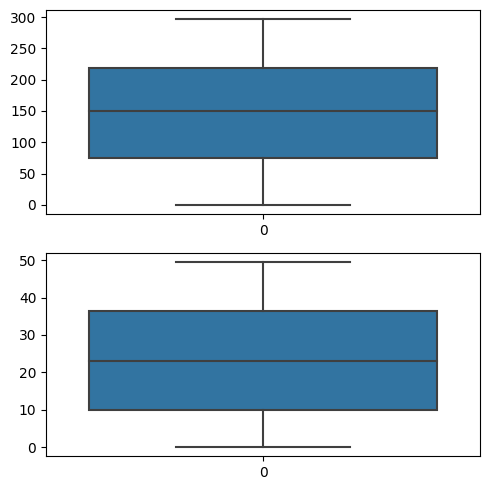

In [13]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt.tight_layout()



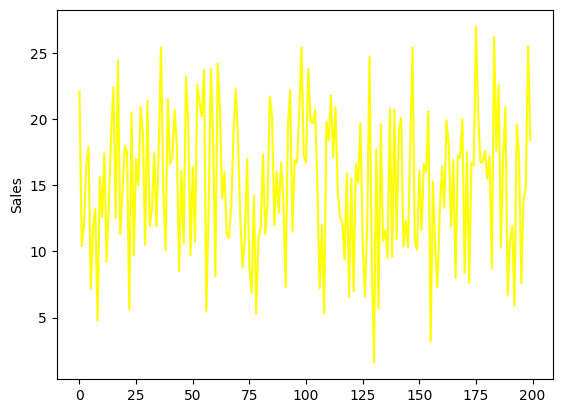

In [14]:
sns.lineplot(df['Sales'],color='yellow')
plt.show()

In [15]:
X = df['TV']
y = df['Sales']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [18]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

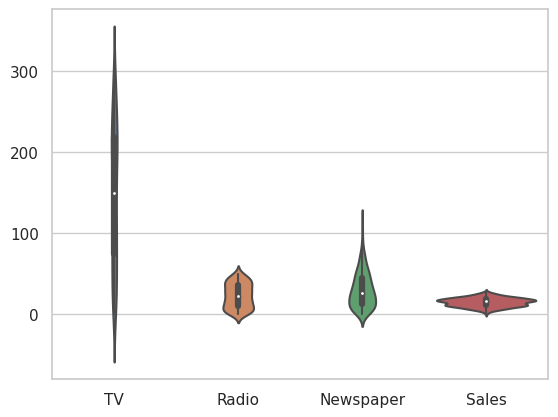

In [20]:
import seaborn
seaborn.set(style = 'whitegrid')
seaborn.violinplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()



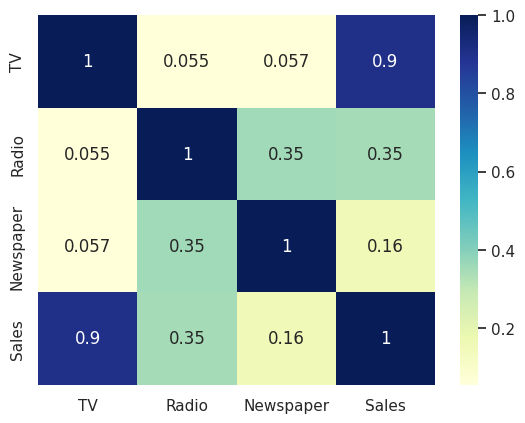

In [21]:

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True,color='green')
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.params


const    6.948683
TV       0.054546
dtype: float64

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


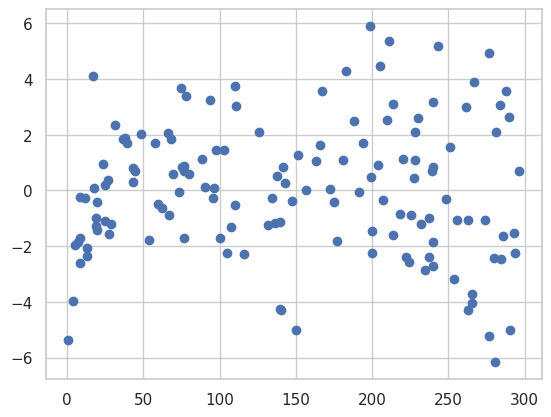

In [29]:
plt.scatter(X_train,res)
plt.show()


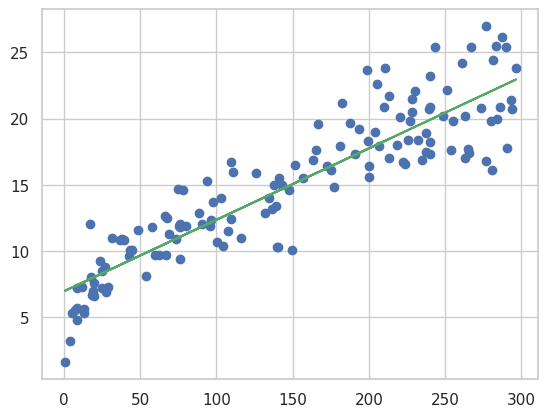

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'g')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [33]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)


In [34]:
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))


2.019296008966232

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [38]:
r_square = r2_score(y_test, y_pred)
r_square

0.792103160124566